# Gain

I took images of the dome with the lights on, covers open, and louvers closed.

- In z we have about 2000 DN in 60 seconds.
- In i we have about 4300 DN in 10 seconds

I took two dome flat images and two biases.

In [1]:
import astropy.io.fits
import astropy.stats
import numpy as np
import matplotlib.pyplot as plt


def findgain(flatfilename0, flatfilename1, biasfilename0, biasfilename1, dataslice=None):

    if dataslice is None:
        dataslice = np.s_[:,:]

    df0 = np.astype(astropy.io.fits.open(flatfilename0)[1].data[dataslice], float)
    df1 = np.astype(astropy.io.fits.open(flatfilename1)[1].data[dataslice], float)
    db0 = np.astype(astropy.io.fits.open(biasfilename0)[1].data[dataslice], float)
    db1 = np.astype(astropy.io.fits.open(biasfilename1)[1].data[dataslice], float)

    df0 -= db0
    df1 -= db1

    level0 = np.mean(df0)
    print("level0 = %.1f DN" % level0)
    plt.imshow(df0, vmax=1.2*level0, vmin=-0.2*level0, origin="lower")
    plt.show()

    level1 = np.mean(df1)
    print("level1 = %.1f DN" % level1)
    plt.imshow(df1, vmax=1.2*level1, vmin=-0.2*level1, origin="lower")
    plt.show()

    diff = df1 - df0

    mean, median, sigma = astropy.stats.sigma_clipped_stats(diff, sigma=5.0)
    print("sigma = %.1f DN" % sigma)
    plt.imshow(diff, vmax=+3*sigma, vmin=-3*sigma, origin="lower")
    plt.show()

    gain = (level0 + level1) / sigma ** 2
    print("gain = %.2f e/DN" % gain)


    diff = db1 - db0

    mean, median, sigma = astropy.stats.sigma_clipped_stats(diff, sigma=5.0)
    print("sigma = %.1f DN" % sigma)
    plt.imshow(diff, vmax=+3*sigma, vmin=-3*sigma, origin="lower")
    plt.show()

    readnoise = (sigma * gain) / np.sqrt(2)
    print("read noise = %.2f e/DN" % readnoise)

level0 = 3904.0 DN


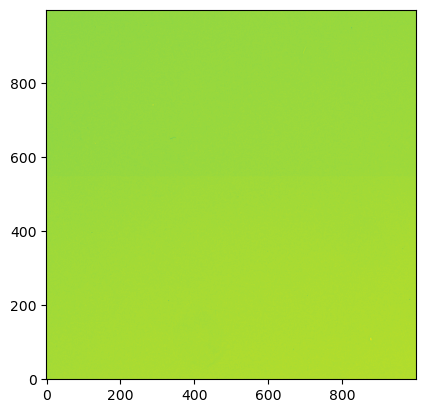

level1 = 3905.5 DN


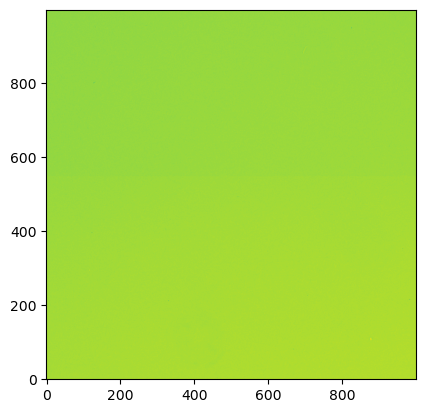

sigma = 59.8 DN


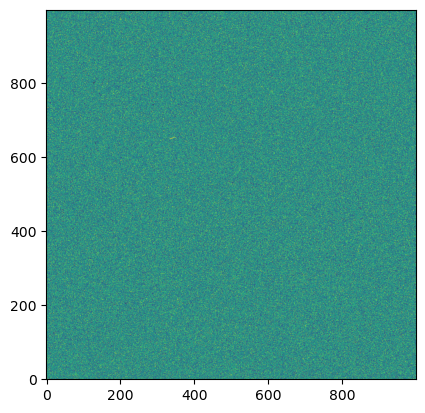

gain = 2.18 e/DN
sigma = 4.4 DN


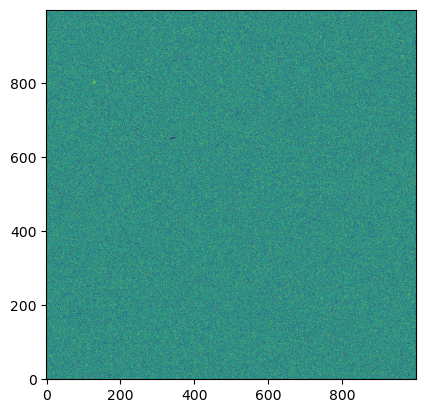

read noise = 6.83 e/DN


In [2]:
findgain(
    "data/20250910T202509C1o.fits.fz",
    "data/20250910T202607C1o.fits.fz",
    "data/20250910T203252C1b.fits.fz",
    "data/20250910T203310C1b.fits.fz",
    #dataslice=np.s_[0:4096,48:4144],
    dataslice=np.s_[1500:2500,1000:2000],
    #dataslice=np.s_[1500:1600,1500:1600],
    )

level0 = 1529.8 DN


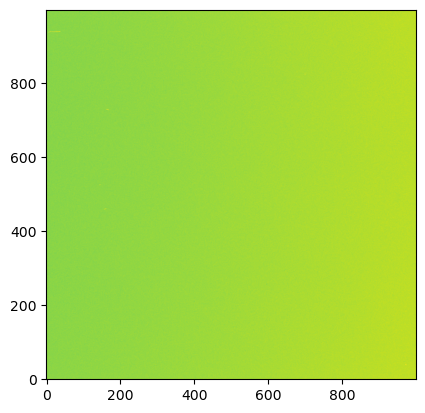

level1 = 1532.6 DN


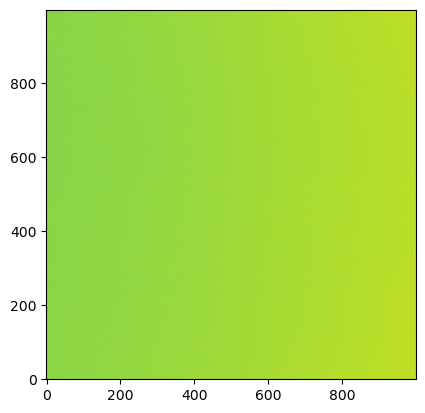

sigma = 38.0 DN


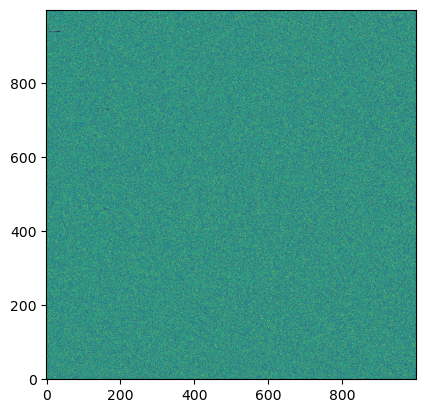

gain = 2.12 e/DN
sigma = 4.7 DN


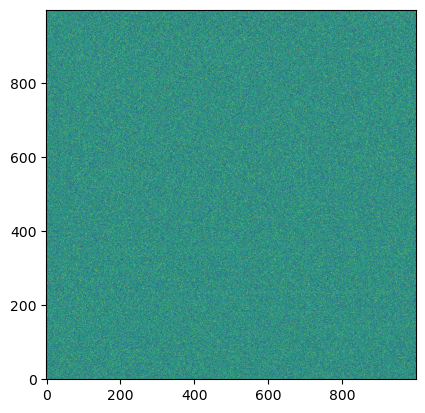

read noise = 7.00 e/DN


In [3]:
    
findgain(
    "data/20250910T201108C2o.fits.fz",
    "data/20250910T201245C2o.fits.fz",
    "data/20250910T203257C2b.fits.fz",
    "data/20250910T203318C2b.fits.fz",
    #dataslice=np.s_[0:4096,48:4144],
    dataslice=np.s_[1500:2500,1000:2000],
    #dataslice=np.s_[1500:1600,1500:1600],
    )